In [0]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import linear_model

In [0]:
df=pd.read_excel(r"data_final.xlsx")

In [0]:
df.fillna(0,inplace=True)
df.replace("jan",0,inplace=True)
df.replace("feb",1,inplace=True)
df.replace("march",2,inplace=True)
df.replace("april",3,inplace=True)
df.replace("may",4,inplace=True)
df.replace("june",5,inplace=True)
df.replace("july",6,inplace=True)
df.replace("august",7,inplace=True)
df.replace("sep",8,inplace=True)
df.replace("october",9,inplace=True)
df.replace("nov",10,inplace=True)
df.replace("dec",11,inplace=True)

In [36]:
df

,Districts,year,month,rainfall,max_temeprature,min_temperature,average_humidity,relative_humidity(17:30) %,relative_humidity(8:30) %,Avg_max_price,Avg_min_price
0,Chittoor,2008,0,15.9,29.0,10.9,0.0,50.0,83.0,0.00,0.00
1,Chittoor,2008,1,3.4,31.2,14.2,0.0,47.0,73.0,0.00,0.00
2,Chittoor,2008,2,51.7,32.2,14.6,0.0,49.0,68.0,0.00,0.00
3,Chittoor,2008,3,3.1,35.7,18.8,0.0,37.0,62.0,0.00,0.00
4,Chittoor,2008,4,78.5,36.0,21.7,0.0,42.0,64.0,1789.57,1377.39
5,Chittoor,2008,5,37.6,32.3,20.3,0.0,52.0,69.0,1216.11,1017.56
6,Chittoor,2008,6,99.6,31.8,20.2,0.0,59.0,72.0,3519.57,2991.30
7,Chittoor,2008,7,82.7,30.1,21.6,0.0,59.0,77.0,0.00,0.00
8,Chittoor,2008,8,146.6,30.3,20.3,0.0,62.0,79.0,0.00,0.00
9,Chittoor,2008,9,170.3,29.6,19.4,0.0,70.0,86.0,0.00,0.00


In [0]:
rain=df['rainfall']
mint=df['min_temperature']
maxt=df['max_temeprature']
mon=df['month']
x={"rainfall":rain,"mintemp":mint,"maxtemp":maxt,"month":mon}
df_features=pd.DataFrame(x)

In [0]:
minp=df['Avg_min_price']
maxp=df['Avg_max_price']
y={"average_max":maxp}
df_target=pd.DataFrame(y)

In [0]:
from sklearn import preprocessing

In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(df_features)

In [0]:
xnn_train, xnn_val_and_test, ynn_train, ynn_val_and_test = train_test_split(x_scale, df_target, test_size=0.3)
xnn_val, xnn_test, ynn_val, ynn_test = train_test_split(xnn_val_and_test, ynn_val_and_test, test_size=0.5)

In [61]:
print(xnn_train.shape, xnn_val.shape, xnn_test.shape, ynn_train.shape, ynn_val.shape, ynn_test.shape)

(462, 4) (99, 4) (99, 4) (462, 1) (99, 1) (99, 1)


In [0]:
model = Sequential([
    Dense(1000, activation='relu', input_shape=(4,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [0]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [75]:
hist = model.fit(xnn_train, ynn_train,
          batch_size=32, epochs=100,
          validation_data=(xnn_val, ynn_val))

Train on 462 samples, validate on 99 samples
Epoch 1/100
462/462 [==============================] - 1s 2ms/step - loss: -4340.6784 - acc: 0.0000e+00 - val_loss: -6747.3178 - val_acc: 0.0000e+00
Epoch 2/100
462/462 [==============================] - 1s 1ms/step - loss: -4643.5465 - acc: 0.0000e+00 - val_loss: -6747.3178 - val_acc: 0.0000e+00
Epoch 3/100
462/462 [==============================] - 1s 1ms/step - loss: -4643.5465 - acc: 0.0000e+00 - val_loss: -6747.3178 - val_acc: 0.0000e+00
Epoch 4/100
462/462 [==============================] - 1s 1ms/step - loss: -4643.5465 - acc: 0.0000e+00 - val_loss: -6747.3178 - val_acc: 0.0000e+00
Epoch 5/100
462/462 [==============================] - 1s 1ms/step - loss: -4643.5465 - acc: 0.0000e+00 - val_loss: -6747.3178 - val_acc: 0.0000e+00
Epoch 6/100
462/462 [==============================] - 1s 1ms/step - loss: -4643.5467 - acc: 0.0000e+00 - val_loss: -6747.3178 - val_acc: 0.0000e+00
Epoch 7/100
462/462 [==============================] - 1s 1ms

In [71]:
model.evaluate(xnn_test,ynn_test)[1]

99/99 [==============================] - 0s 69us/step


0.0

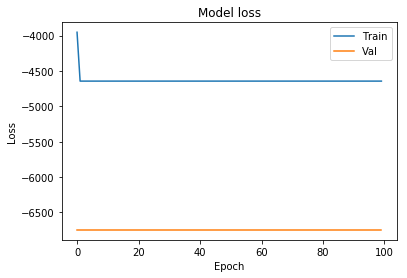

In [70]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

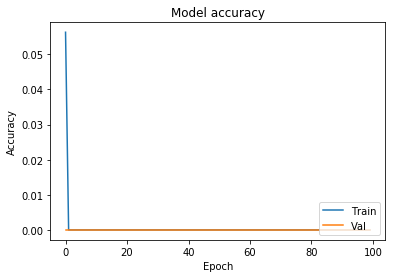

In [72]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()